<a href="https://colab.research.google.com/github/noraini0210/noraini0210/blob/main/OHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit to [Pangeo Gallery-NCAR Gallery](https://gallery.pangeo.io/repos/NCAR/notebook-gallery/notebooks/Run-Anywhere/Ocean-Heat-Content/OHC_tutorial.html)

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### **Understanding data from drive**

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/OHC\ Data/IAP_Ocean_heat_content_0_2000m/

/content/drive/MyDrive/Colab_Notebooks/OHC Data/IAP_Ocean_heat_content_0_2000m


In [ ]:
cd IAP_Ocean_heat_content_0_2000m/

/content/drive/MyDrive/Colab_Notebooks/OHC Data/IAP_Ocean_heat_content_0_2000m/IAP_Ocean_heat_content_0_2000m


In [ ]:
!pwd

/content/drive/MyDrive/Colab_Notebooks/OHC Data/IAP_Ocean_heat_content_0_2000m/IAP_Ocean_heat_content_0_2000m


In [ ]:
#Import required libraries 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline

In [ ]:
#Load one file
ds = xr.load_dataset("OHC_IAP_0_2000m_year_1940_month_01.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * time     (time) float32 1.94e+05
Data variables:
    OHC100   (lat, lon) float32 nan nan nan ... -6.634e+08 -6.655e+08 -6.678e+08
    OHC300   (lat, lon) float32 nan nan nan ... -9.382e+08 -9.413e+08 -9.582e+08
    OHC700   (lat, lon) float32 nan nan nan ... -5.022e+08 -5.028e+08 -5.183e+08
    OHC1500  (lat, lon) float32 nan nan nan ... -2.551e+09 -2.559e+09 -2.582e+09
    OHC2000  (lat, lon) float32 nan nan nan ... -3.612e+09 -3.63e+09 -3.662e+09
Attributes:
    Title:           IAP 2-D Ocean Heat Content using IAP T/S data
    StartYear:       1940
    StartMonth:      1
    StartDay:        1
    EndYear:         1940
    EndMonth:        1
    EndDay:          30
    Period:          1
    GridProjection:  Mercator, gridded
    GridPoints:      360x180
    Creator:         Lijing Cheng From IAP,CAS,P.R.China
    Reference:       Cheng and Zhu 2016. Journal of Climate; Cheng et al. 201...

The OHC divided into 5 categories of depth.



In [ ]:
# Examine OHC100 data
ds["OHC100"] #or ds.OH10

<xarray.DataArray 'OHC100' (lat: 180, lon: 360)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [-6.7029427e+08, -6.7369459e+08, -6.7709658e+08, ...,
        -6.6100531e+08, -6.6328506e+08, -6.6649024e+08],
       [-6.7078835e+08, -6.7347558e+08, -6.7608723e+08, ...,
        -6.6183296e+08, -6.6451763e+08, -6.6738701e+08],
       [-6.7009133e+08, -6.7237766e+08, -6.7466515e+08, ...,
        -6.6341190e+08, -6.6554509e+08, -6.6779782e+08]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
Attributes:
    long_name:      ocean heat content 0-100m
    units:          J/m^2
    standard_name:  Ocean Heat Content

In [ ]:
#Check OH100 dimensions
ds["OHC100"].dims

('lat', 'lon')

In [ ]:
#Check OH100 coordinates
ds["OHC100"].coords

Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0

In [ ]:
#Extract coordinate variables for OH100
ds["OHC100"].lat #or ds.coords["lat"]

<xarray.DataArray 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,  49.5,
        50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,
        60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,
        70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      latitude
    units:          degree_north
    standard_name:  latitude

In [ ]:
ds["OHC100"].lon

<xarray.DataArray 'lon' (lon: 360)>
array([  1.,   2.,   3., ..., 358., 359., 360.], dtype=float32)
Coordinates:
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
Attributes:
    long_name:      longitude
    units:          degree_east
    standard_name:  longitude

In [ ]:
#Show the arbritary attributes of whole data
ds.attrs

{'Creator': 'Lijing Cheng From IAP,CAS,P.R.China',
 'EndDay': '30',
 'EndMonth': '1',
 'EndYear': '1940',
 'GridPoints': '360x180',
 'GridProjection': 'Mercator, gridded',
 'Period': '1',
 'Reference': 'Cheng and Zhu 2016. Journal of Climate; Cheng et al. 2017. Science Advances. Website for OHC: http://159.226.119.60/cheng/',
 'StartDay': '1',
 'StartMonth': '1',
 'StartYear': '1940',
 'Title': 'IAP 2-D Ocean Heat Content using IAP T/S data'}

In [ ]:
#Show the arbritary attributes of a variable in the data
ds["OHC100"].attrs

{'long_name': 'ocean heat content 0-100m',
 'standard_name': 'Ocean Heat Content',
 'units': 'J/m^2'}

In [ ]:
#Show the underlying data from OHC100
ds["OHC100"].data #same with ds["OHC100"]

array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [-6.7029427e+08, -6.7369459e+08, -6.7709658e+08, ...,
        -6.6100531e+08, -6.6328506e+08, -6.6649024e+08],
       [-6.7078835e+08, -6.7347558e+08, -6.7608723e+08, ...,
        -6.6183296e+08, -6.6451763e+08, -6.6738701e+08],
       [-6.7009133e+08, -6.7237766e+08, -6.7466515e+08, ...,
        -6.6341190e+08, -6.6554509e+08, -6.6779782e+08]], dtype=float32)

In [ ]:
#Show type of data
type(ds["OHC100"].data)

numpy.ndarray

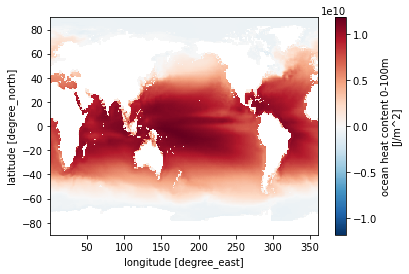

In [ ]:
#Visulize global OHC100 data
ds["OHC100"].plot(x="lon")

In [ ]:
#Using "nearest indexing at multiple points"
ds.sel(lon=[1.0,280.0], lat=[-30.5, 30.5], method="nearest")

<xarray.Dataset>
Dimensions:  (lat: 2, lon: 2, time: 1)
Coordinates:
  * lat      (lat) float32 -30.5 30.5
  * lon      (lon) float32 1.0 280.0
  * time     (time) float32 1.94e+05
Data variables:
    OHC100   (lat, lon) float32 7.482e+09 7.181e+09 nan 9.185e+09
    OHC300   (lat, lon) float32 1.893e+10 1.637e+10 nan 2.498e+10
    OHC700   (lat, lon) float32 3.323e+10 2.702e+10 nan 3.134e+10
    OHC1500  (lat, lon) float32 4.498e+10 3.886e+10 nan 3.134e+10
    OHC2000  (lat, lon) float32 5.088e+10 4.346e+10 nan 3.134e+10
Attributes:
    Title:           IAP 2-D Ocean Heat Content using IAP T/S data
    StartYear:       1940
    StartMonth:      1
    StartDay:        1
    EndYear:         1940
    EndMonth:        1
    EndDay:          30
    Period:          1
    GridProjection:  Mercator, gridded
    GridPoints:      360x180
    Creator:         Lijing Cheng From IAP,CAS,P.R.China
    Reference:       Cheng and Zhu 2016. Journal of Climate; Cheng et al. 201...

In [ ]:
# weight by cell_area and take mean over (lat, lon)
ds.weighted(cell_area).mean(["lon", "lat"]).air.plot(label='right') # the correct way
ds.mean(["lon", "lat"]).air.plot(label='wrong') # dont do this!
plt.legend()

NameError: ignored

### **Working on multiple files**

There were **972 .nc files (monthly OHC data from 1940 to 2020)** in the folder 

Systematic methods required to read all the files

### **Visualize OHC over IPWP**